**Upload training set of images**

In [77]:
from google.colab import files
uploaded = files.upload()
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['training.zip']), "r")
zf.extractall()

Saving training.zip to training.zip


**Upload test set of images**

In [78]:
from google.colab import files
uploaded = files.upload()
import zipfile
import io
zf = zipfile.ZipFile(io.BytesIO(uploaded['testing.zip']), "r")
zf.extractall()

Saving testing.zip to testing.zip


**Dependencies importing and drive mount**

In [79]:
%matplotlib inline

import os
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/comp478/SuitDetection")
os.listdir()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['training',
 'testing',
 'weights.hdf5',
 'shapes.h5',
 'training.zip',
 'testing.zip']

**Display training set of images (Hearts)**

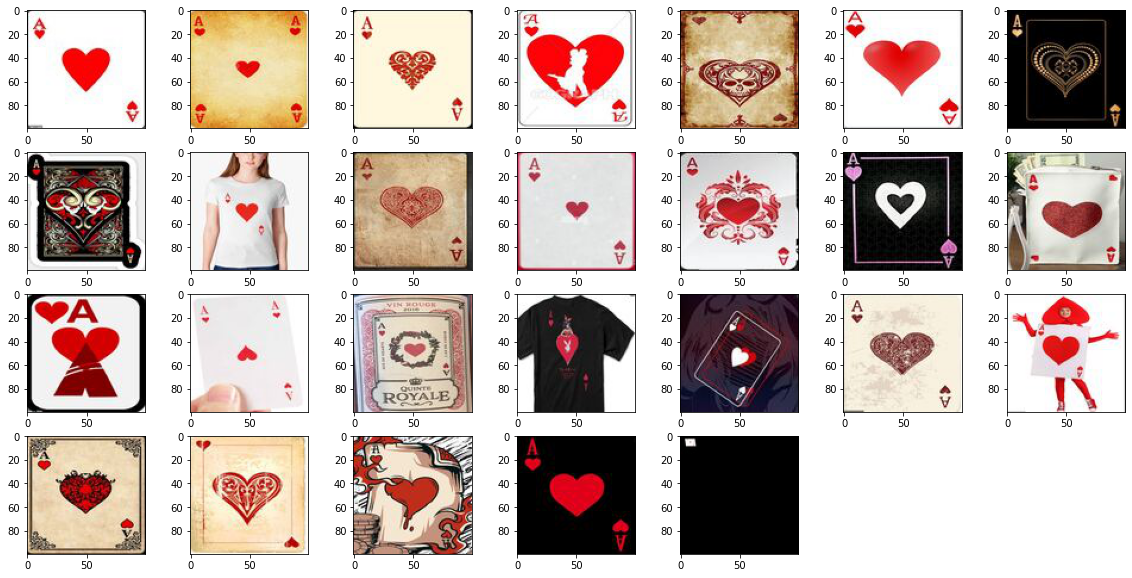

In [87]:
dataset = []
for img_path in glob.glob('training/Hearts/*.jpg'):
    dataset.append(mpimg.imread(img_path))
plt.figure(figsize=(20,10))
columns = 7
for i, image in enumerate(dataset):
    plt.subplot(len(dataset) / columns + 1, columns, i + 1)
    plt.imshow(image)

**Adding convolution layers and activation function and compile**





In [88]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape = (28, 28, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))

# second convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))

# third convolutional layer
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 1000, activation = 'relu'))
model.add(Dropout(0.5)) 
model.add(Dense(units = 4, activation = 'softmax'))
#compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [89]:
x_train = ImageDataGenerator(rescale = 1./255)
x_test = ImageDataGenerator(rescale = 1./255)

training_set = x_train.flow_from_directory('training',
                                                 target_size = (28, 28),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = x_test.flow_from_directory('testing',
                                            target_size = (28, 28),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 154 images belonging to 4 classes.
Found 39 images belonging to 4 classes.


**Model training**

In [90]:


checkpointer = ModelCheckpoint('weights.hdf5', 
                               monitor = 'val_accuracy',
                               verbose=1, 
                               save_best_only=True)
history = model.fit(training_set,
                                   steps_per_epoch = 10,
                                   epochs = 30,
                                   callbacks=[checkpointer],
                                   validation_data = test_set,
                                   validation_steps = 30)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.3634 - accuracy: 0.3896WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 30 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_accuracy improved from -inf to 0.25641, saving model to weights.hdf5
10/10 [==============================] - 5s 466ms/step - loss: 1.3634 - accuracy: 0.3896 - val_loss: 1.4690 - val_accuracy: 0.2564
Epoch 2/30
10/10 [==============================] - 3s 321ms/step - loss: 1.3061 - accuracy: 0.3961
Epoch 3/30
10/10 [==============================] - 3s 336ms/step - loss: 1.1459 - accuracy: 0.5000
Epoch 4/30
10/10 [==============================] - 4s 370ms/step - loss: 1.0734 - accuracy: 0.5325
Epoch 5/30
10/10 [==============================] - 3s 328ms/step - loss: 0.8806 - accuracy: 0.6494
Epoch 6/30
10/10 [=========

In [91]:
model.load_weights('weights.hdf5')
model.save('shapes.h5')

**Plotting Training results**

ValueError: ignored

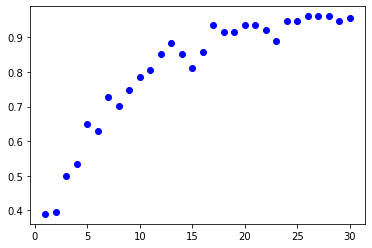

In [92]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Suit detection verifying**

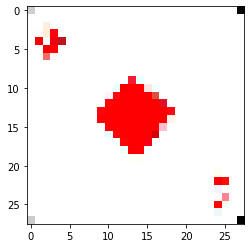

(1, 28, 28, 3)


In [107]:
import keras
img_path = 'testing/Diamonds/1.JPG'

img = keras.preprocessing.image.load_img(img_path, target_size=(28, 28))
img_tensor = keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

plt.imshow(img_tensor[0])
plt.show()

print(img_tensor.shape)

**Prediction**

In [109]:
x = keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

predict_x=model.predict(images) 

classes = model.predict(images)
classes=np.argmax(predict_x,axis=1)

if classes == 2:
  print("Predicted card suit is Hearts")
elif classes == 3:
  print("Predicted card suit is Spades")
elif classes == 1:
  print("Predicted card suit is Diamonds")
elif classes == 0:
  print("Predicted card suit is Clubs")

Predicted card suit is Diamonds
